### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\DATASETS\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

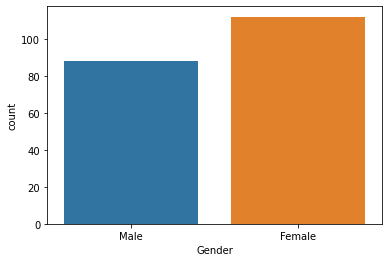

In [11]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

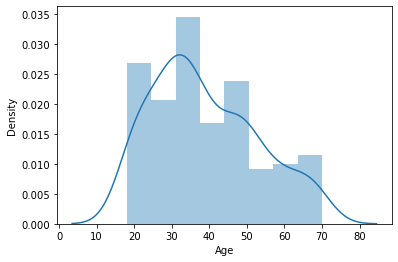

In [13]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

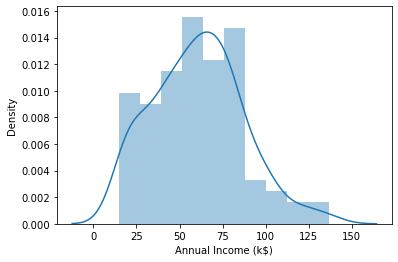

In [14]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

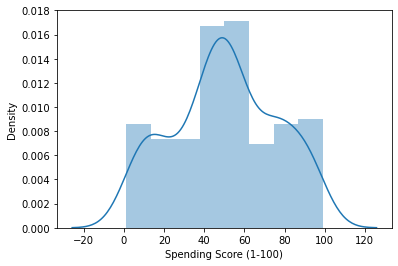

In [15]:
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age'>

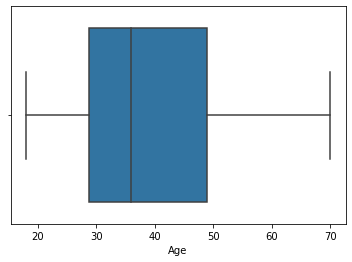

In [16]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)'>

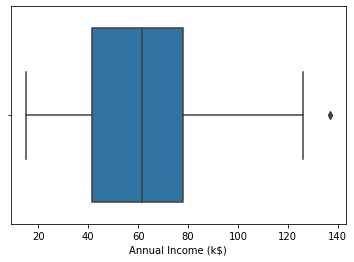

In [17]:
sns.boxplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

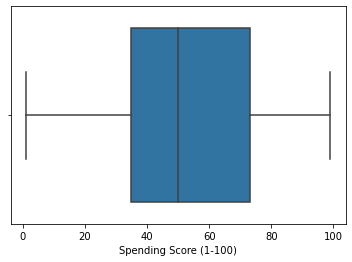

In [18]:
sns.boxplot(df['Spending Score (1-100)'])

### Encoding

In [35]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [54]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [55]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Create the Model

In [56]:
from sklearn.cluster import KMeans
kmeans=KMeans()
kmeans.fit_predict(x)

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 2, 5, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 6, 0, 6, 0,
       4, 0, 6, 0, 6, 0, 6, 0, 6, 0, 4, 0, 6, 0, 4, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 4, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7,
       3, 7])

### Elbow Method to find the Best Cluster Value

In [57]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [58]:
wcss

[269981.28,
 183069.17582751293,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25011.839349156595,
 21797.084944646376,
 19740.010370359305]

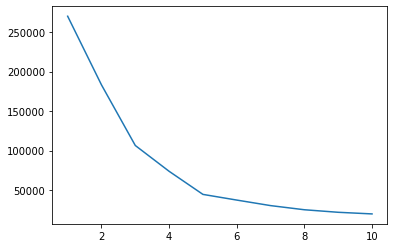

In [59]:
plt.plot(range(1,11),wcss)

In [60]:
kmeans=KMeans(n_clusters=5)
y_means=kmeans.fit_predict(x)
y_means

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

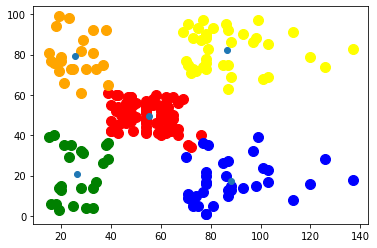

In [78]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c='red')
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c='yellow')
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c='green')
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c='blue')
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c='orange')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.show()

In [1]:
from pyspark import Sparkse